<a href="https://colab.research.google.com/github/jnsoliveira/Atividades/blob/main/Trilha6-RecuperacaoInformacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LINKS**

Github - https://github.com/jnsoliveira/Atividades/blob/main/Trilha6-RecuperacaoInformacao.ipynb

GoogleColab - https://colab.research.google.com/github/jnsoliveira/Atividades/blob/main/Trilha6-RecuperacaoInformacao.ipynb

# **RECUPERAÇÃO DA INFORMAÇÃO NA WEB E EM REDE SOCIAIS**
**Atividade - Trilha 6**

Chegou a hora de você mostrar o que você aprendeu. Nas últimas três trilhas, discutimos algumas coisas de processamento de linguagem natural.

Aprendemos a extrair palavras-chave de anúncios classificados, identificar padrões em autoria de textos e, a partir do uso de palavras em alguns textos, classificá-las quanto ao sentimento positivo ou negativo.

Escolha uma corpora de documentos correlatos e extraia as suas principais palavras e apresente um histograma.

Documentos correlatos podem ser diversos artigos de um mesmo autor, diversas matérias jornalísticas sobre um mesmo tema (futebol, política, etc.), review de um mesmo grupo de produto ou serviços (notas de cinema, restaurante, etc.).

Para os alunos que não desejarem criar um web cralwer para buscar os dados poderão buscar alguma fonte confiável na internet ou utilizar a lista de artigos de diversos blogueiros disponibilizado pelo professor no GitHub.

In [ ]:
#Bibliotecas que serão utilizadas
import pandas as pd
from bs4 import BeautifulSoup
import requests
import json
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt

#Instalando o unidecode
!pip install unidecode
from unidecode import unidecode

In [ ]:
#Base disponibilizada pelo professor
dados = json.load(open('UolBlogs.json', 'r'))

#Textos da Thays Oyama
texto = []
for grupo in dados:
    if 'Thays Oyama' in grupo['author']:
        texto.append(grupo)

#Data frame com as palavras dos textos do autor
texto_df = pd.DataFrame(texto)

In [ ]:
#Palavras de parada
nltk.download('stopwords')
stop = stopwords.words('portuguese')

#Tratamentos dos dados
texto_df['content'] = texto_df['content'].str.lower().apply(lambda x:unidecode(x)) #Transformando em minuscula e removendo acentos
texto_df['content'] = texto_df['content'].apply(lambda x: ' '.join([w for w in x.split() if w not in (stop)])) #Retirando palavras de parada
texto_df['content'] = texto_df['content'].str.replace('[{}]'.format(string.digits),'') #Retirando os numeros
texto_df['content'] = texto_df['content'].str.replace('[{}]'.format(string.punctuation),'') #Retirando pontuação
display(texto_df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':


,author,title,content
0,Thays Oyama,"Centrão já fala em ""derrota"" de Bolsonaro, mas...",importantes liderancas bloco centrao ja falam ...
1,Thays Oyama,Apoio de Tasso em prévias eleva vantagem de Le...,apoio diretorios santa catarina paraiba cand...
2,Thays Oyama,"Desdenhado como ""casamento de viúvos"", novo pa...",casamento viuvos politicos olham fusao ser anu...
3,Thays Oyama,"Definido o novo ministro, Moraes decidirá se v...",ministro alexandre moraes nao pressa decidir m...
4,Thays Oyama,Indecisão de Moro não é fruto só de questões f...,sergio moro continua jogando parado recente di...
...,...,...,...
419,Thays Oyama,"Os números mostram: sim, Bolsonaro está perden...",imagens mostradas tv compartilhadas whatsapp d...
420,Thays Oyama,Terá Bolsonaro enlouquecido?,presidente bolsonaro anda dizendo ai surto cor...
421,Thays Oyama,A tragédia mais silenciosa do coronavírus,amiga relatou velorio ontem homem havia morrid...
422,Thays Oyama,Bolsonaro continua a derreter nas redes sociais,jair bolsonaro programa ratinho anteontem conv...


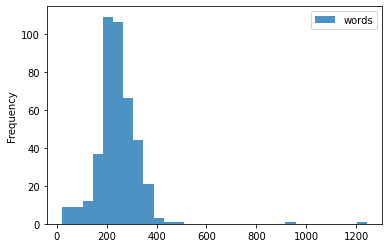

In [ ]:
#Contagem de palavras por cada linha do artigo
texto_df['words']=texto_df['content'].str.split().str.len()

#Retira artigos que tenham gerado menos de 20 letras
texto_df=texto_df.loc[(texto_df['words']>20)]

#Plota o data frame em histograma para uma avaliação
texto_df.plot.hist(bins=30, alpha=0.8)

In [ ]:
#Contando as palavras
text_all = ""

for i in texto_df['content']:
    text_all = text_all + i
    
listadepalavras = text_all.split()

palavras = {}
for i in listadepalavras:
    palavras[i] = listadepalavras.count(i)

print(palavras)

{'importantes': 17, 'liderancas': 39, 'bloco': 39, 'centrao': 143, 'ja': 494, 'falam': 6, 'abertamente': 3, 'possibilidade': 64, 'derrota': 18, 'presidente': 1269, 'jair': 370, 'bolsonaro': 1806, 'eleicoes': 106, 'representantes': 25, 'pp': 46, 'principais': 29, 'siglas': 14, 'unica': 41, 'forma': 117, 'excapitao': 293, 'chegar': 29, 'minimamente': 2, 'competitivo': 5, 'disputa': 31, 'crescer': 12, 'eleitorado': 35, 'chamadas': 2, 'classes': 22, 'd': 21, 'e': 255, 'onde': 94, 'estao': 98, 'vivem': 4, 'pobreza': 4, 'extrema': 2, 'porque': 162, 'visao': 25, 'desses': 33, 'aliados': 66, 'queda': 30, 'apoio': 102, 'segmento': 24, 'classe': 19, 'media': 29, 'iniciada': 3, 'pandemia': 148, 'aprofundada': 1, 'impacto': 13, 'inflacao': 19, 'sobre': 305, 'preco': 39, 'combustiveis': 6, 'alimentos': 7, 'irreversivel': 2, 'ultimo': 54, 'datafolha': 32, 'mostrou': 52, 'nesse': 65, 'grupo': 87, 'cresceu': 9, 'rejeicao': 17, 'hoje': 314, 'ineditos': 1, 'ainda': 227, 'horizonte': 11, 'pareca': 3, 'pl